In [2]:
############################################
###### Data visualization ##################
############################################
import numpy as np
import pandas as pd
from pandas import Series 
from numpy.random import randn 
#stats
from scipy import stats
#plot 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

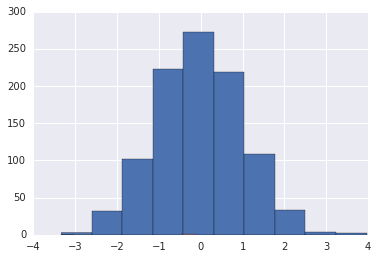

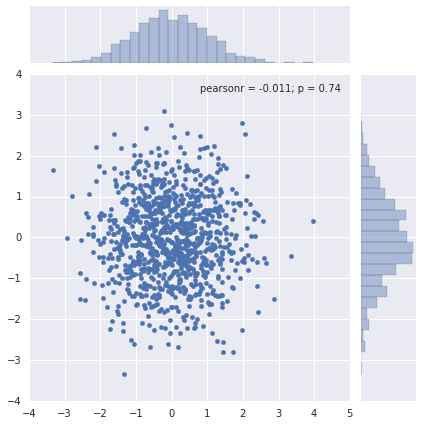

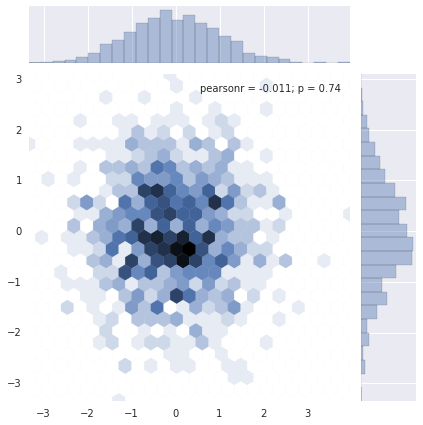

In [26]:
###### histogram #######
dataset1 = randn(1000)
dataset2 = randn(1000)
plt.hist(dataset1)                            #plot histgram
plt.hist(dataset2,color='indianred',normed=True, alpha=0.5,bins=20)

#joint plot 
sns.jointplot(dataset1,dataset2)              #joint plot 
sns.jointplot(dataset1,dataset2,kind='hex')   

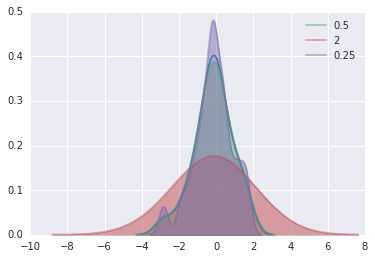

In [34]:
######## kernel density estimation plot
dataset = randn(25)
sns.kdeplot(dataset)                              #kernel density plot 

#use multiple bendwidths
#plot based on bendwidth, higher bendwidth, more smooth
for bw in [0.5,2,0.25]:
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw,shade=True,alpha=0.5) 

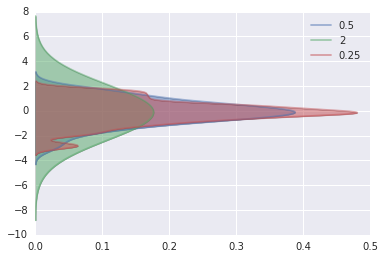

In [35]:
##plot vertical 
for bw in [0.5,2,0.25]:
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw,shade=True,alpha=0.5, vertical=True) 

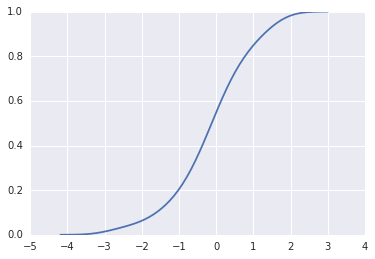

In [36]:
## plot cdf plot 
sns.kdeplot(dataset,cumulative=True)

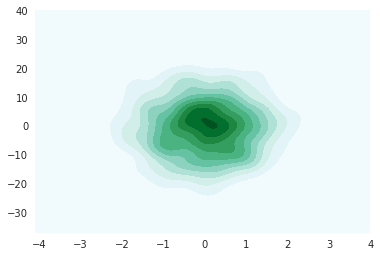

In [41]:
## multidimensional data ############
######don't really understand 

# Mean center of data
mean = [0,0]
# Diagonal covariance
cov = [[1,0],[0,100]]
# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# Plot our dataframe
sns.kdeplot(dframe,shade=True)

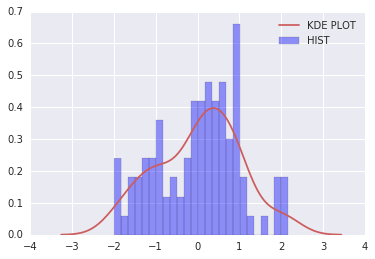

In [46]:
##########combine plots ###########
dataset = randn(100)
#sns.distplot(dataset,bins=25)                                  #combine kdensit plot and historam
#sns.distplot(dataset,bins=25,rug=True,hist=False)              #turn specific charts on and off 
sns.distplot(dataset,bins=25,                           
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST'})           #control indivisual charts

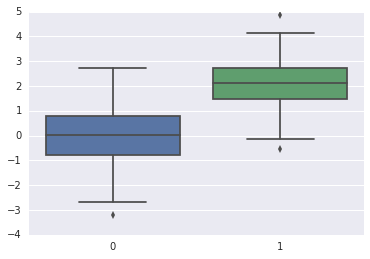

In [11]:
############# box plots ###########
data1 = randn(100)
data2 = randn(100) + 2 #offset the mean 
sns.boxplot(data=[data1,data2]) #(whis=np.inf,vert=False,etc)   #box plot 

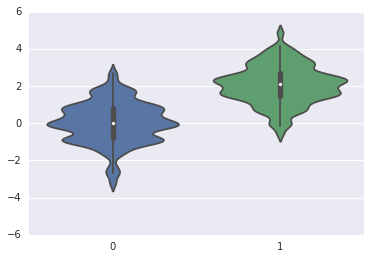

In [20]:
###### violinplot ###########
sns.violinplot(data =[data1,data2],bw=0.2)             #violinplot, you can set bins width as well

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


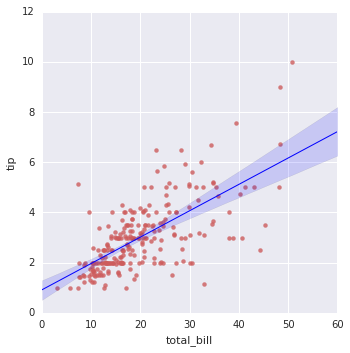

In [38]:
#################################################
########### regression plots ####################

#scatter plot with fit line
tips = sns.load_dataset('tips')
print tips.head()
sns.lmplot(x='total_bill',y='tip',data=tips,ci=95,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})                        #like stata l fit plot 
                                                                          #we can also put order e.g order = 4

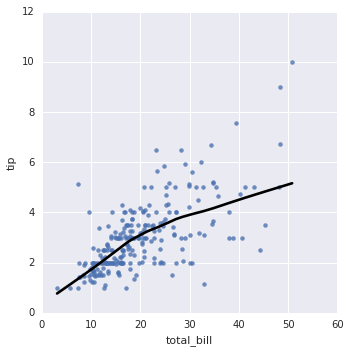

In [37]:
######lowess fit #################
sns.lmplot('total_bill','tip',tips,lowess=True,line_kws={'color':'black'}) #lowess fit plot 

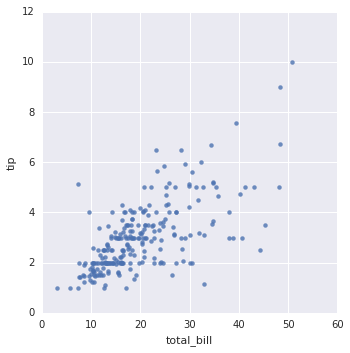

In [32]:
sns.lmplot('total_bill','tip',data=tips,fit_reg=False)                    #scatter plot 

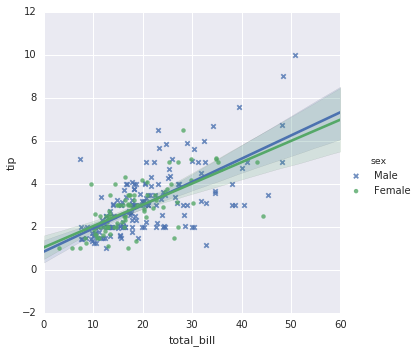

In [34]:
###### mark subset ############
sns.lmplot('total_bill','tip',tips,hue='sex',markers=['x','o'])          #mark subsets, hue and marker option, 

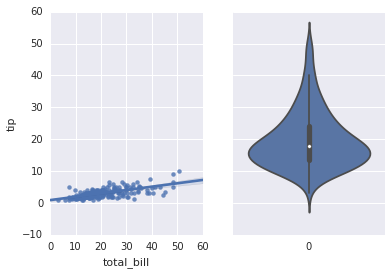

In [48]:
########### combine multiple plot ###########
fig,(axis1,axis2) = plt.subplots(1,2,sharey=True)
sns.regplot('total_bill','tip',tips,ax=axis1)                           #l fit plot 
sns.violinplot(data = tips['total_bill'],ax=axis2)                      #violinplot

year      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                        
January    112   115   145   171   196   204   242   284   315   340   360   
February   118   126   150   180   196   188   233   277   301   318   342   
March      132   141   178   193   236   235   267   317   356   362   406   
April      129   135   163   181   235   227   269   313   348   348   396   
May        121   125   172   183   229   234   270   318   355   363   420   

year      1960  
month           
January    417  
February   391  
March      419  
April      461  
May        472  


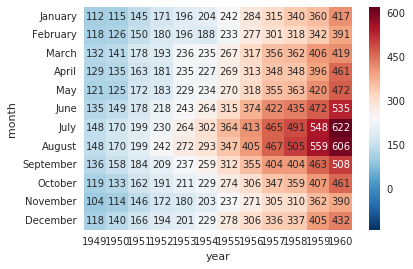

In [4]:
###############################
##### Heatmaps and clustered matrices
##########

flight = sns.load_dataset('flights')
flight=flight.pivot('month','year','passengers')
print flight.head()
sns.heatmap(flight,annot=True,fmt='d',center=flight.loc['January',1955])   #heat map

      flight  year
year              
1949    1520  1949
1950    1676  1950
1951    2042  1951
1952    2364  1952
1953    2700  1953
1954    2867  1954
1955    3408  1955
1956    3939  1956
1957    4421  1957
1958    4572  1958
1959    5140  1959
1960    5714  1960


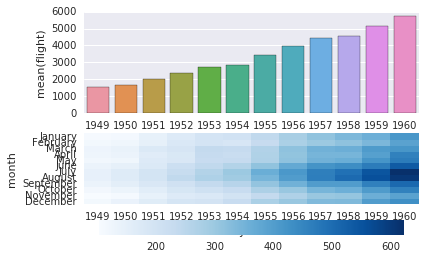

In [3]:
######## more plots  ##########
f,(axis1,axis2) =plt.subplots(2,1)                                     #arrange vertically 
flight = sns.load_dataset('flights')
flight=flight.pivot('month','year','passengers')
ser1 = flight.sum()
df_flight = pd.DataFrame(ser1)
df_flight['year']= df_flight.index.values
df_flight.rename(columns={0:'flight'},inplace=True)                                 #construct a dataframe with year and flight sum
print df_flight
# create plot 
sns.barplot(x='year',y='flight',data=df_flight,ax = axis1)
sns.heatmap(data=flight,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})
